In [1]:
import numpy as np
from multiprocessing import Pool
from sklearn import svm
from time import time



In [2]:
test = np.loadtxt("optdigits.txt", delimiter = ",")
X = test[:, 0:64]
y = test[:, 64]

In [3]:
def cvkfold(X, y, tuning_params, partitions, k):
    n_tuning_params = tuning_params.shape[0]

    partition = partitions[k]
    TRAIN = np.delete(np.arange(0, X.shape[0]), partition)
    TEST = partition
    X_train = X[TRAIN, :]
    y_train = y[TRAIN]

    X_test = X[TEST, :]
    y_test = y[TEST]

    accuracies = np.zeros(n_tuning_params)
    for i in range(0, n_tuning_params):
        svc = svm.SVC(C = tuning_params[i], kernel = "linear")
        accuracies[i] = svc.fit(X_train, y_train).score(X_test, y_test)
    return accuracies

In [4]:
K = 5
tuning_params = np.logspace(-6, -1, 15)
partitions = np.array_split(np.random.permutation([i for i in range(0, X.shape[0])]), K)

In [5]:
elapsedtime=[]
speedup=[]
efficiency=[]
for processes in (1, 2, 4, 8):
 t1 = time()
 pool = Pool(processes)
 args = [(X, y, tuning_params, partitions, k) for k in range(0, K)]
 Accuracies = np.array(pool.starmap(cvkfold, args))
 CV_accuracy = np.mean(Accuracies, axis = 0)
 best_tuning_param = tuning_params[np.argmax(CV_accuracy)]
 print('Best tuning param %0.6f.\n'% best_tuning_param)
 pool.close()
 t2 = (time()-t1)
 print('\nPool Parallelism runs %0.3f seconds on %s CPUs.\n' % (t2, processes))
 elapsedtime.append(t2)
 speed=elapsedtime[0]/t2
 speedup.append(speed)
 print('\nspeed is ',speed, 'times on', processes, 'cpus')
 print('\n\n')
print(elapsedtime)

Best tuning param 0.001638.


Pool Parallelism runs 25.242 seconds on 1 CPUs.


speed is  1.0 times on 1 cpus



Best tuning param 0.001638.


Pool Parallelism runs 14.716 seconds on 2 CPUs.


speed is  1.7152540049837206 times on 2 cpus



Best tuning param 0.001638.


Pool Parallelism runs 12.751 seconds on 4 CPUs.


speed is  1.9796164614247038 times on 4 cpus



Best tuning param 0.001638.


Pool Parallelism runs 10.564 seconds on 8 CPUs.


speed is  2.389370526334034 times on 8 cpus



[25.242329120635986, 14.716379642486572, 12.751121044158936, 10.56442642211914]


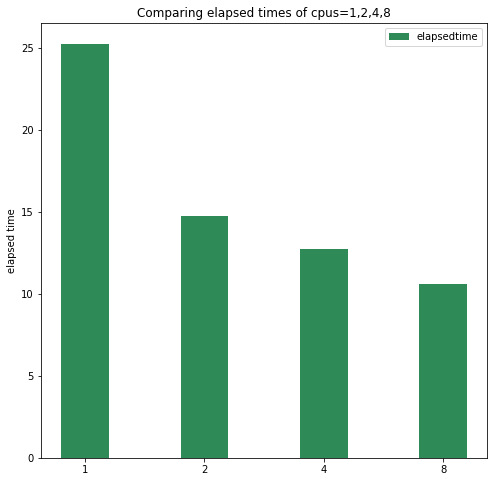

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt 
cpus = ['1','2','4','8']

# f1score=[logf1,cnbf1,knnf1,deepf1]
x_axis = np.arange(len(cpus))

# Multi bar Chart

plt.bar(x_axis, elapsedtime, width=0.4, label = 'elapsedtime',color='seagreen')
plt.xticks(x_axis, cpus)
# plt.xticks(x_axis, Algorithms)
plt.ylabel('elapsed time')
plt.title('Comparing elapsed times of cpus=1,2,4,8')
# Add legend
plt.gcf().set_size_inches(8, 8)
plt.legend()

# Display

plt.show()
plt.savefig('/home/manapati.m/csye7105/hw3/part3speedupbar.png')

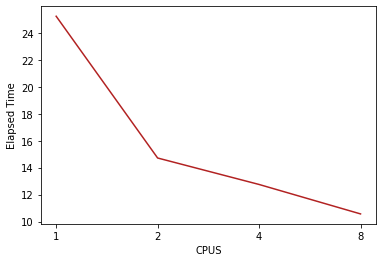

In [7]:
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline
cpus = ['1','2','4','8']
fig = sns.lineplot(x=cpus, y=elapsedtime,color = 'firebrick')
fig.set(xlabel='CPUS', ylabel='Elapsed Time')
plt.savefig('/home/manapati.m/csye7105/hw3_moukthika_manapati/part3speedupcurve.png')

[1.0, 1.7152540049837206, 1.9796164614247038, 2.389370526334034]


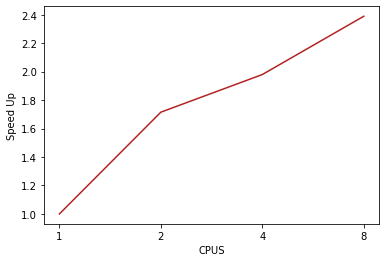

In [8]:
cpus = ['1','2','4','8']
print(speedup)
fig = sns.lineplot(x=cpus, y=speedup,color = 'firebrick')
fig.set(xlabel='CPUS', ylabel='Speed Up')
plt.savefig('/home/manapati.m/csye7105/hw3_moukthika_manapati/part3speedup.png')